# ME 364 Midterm Project - Part 2

## 1. Setup and Data Cleaning

### DataFrame Setup
Import libraries and dataset, create dataframe, and show first few lines
to confirm that it imported correctly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create dataframe from raw csv link
url = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Midterm%20Project/Part%202/Manufacturing_Industry_Database.csv'
df = pd.read_csv(url)

# Set options to display all columns
pd.set_option('max_columns', None)

# Display first 5 rows of dataframe
df.head()

,naics,naics_title,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,invest,invent,energy,cap,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
0,311111,Dog and Cat Food Manufacturing,1958,18.0,81.3,12.0,25.7,49.8,1042.4,752.4,266.9,17.8,59.5,7.0,1212.7,517.6,695.0,0.354,0.133,0.168,0.116,NaN,0.317,NaN,0.318
1,311111,Dog and Cat Food Manufacturing,1959,17.9,82.5,11.8,25.5,49.4,1051.0,758.9,268.7,18.3,65.2,7.7,1299.0,573.7,725.3,0.345,0.131,0.169,0.115,0.002,0.318,0.002,0.318
2,311111,Dog and Cat Food Manufacturing,1960,17.7,84.8,11.7,25.4,50.0,1050.2,752.8,269.9,16.1,58.2,8.5,1350.7,611.6,739.2,0.274,0.129,0.173,0.119,0.217,0.394,0.216,0.395
3,311111,Dog and Cat Food Manufacturing,1961,17.5,87.4,11.5,25.4,51.4,1119.7,803.6,287.8,14.5,58.1,9.3,1394.4,642.6,752.0,0.273,0.131,0.172,0.117,0.024,0.404,0.024,0.405
4,311111,Dog and Cat Food Manufacturing,1962,17.6,90.2,11.5,25.2,52.1,1175.7,853.3,294.5,18.4,61.9,10.1,1437.8,669.1,768.7,0.277,0.132,0.174,0.119,-0.007,0.401,-0.007,0.402


### Missing Data Count

Identify total number of entries and evaluate missing data by both
number and percentage of values missing from each column

In the table below, multiple groups of columns are immediately apparent
which have precisely the same number of missing values and can therefore
be assumed to go together (none or all missing for any given row).

Also, to account for the possibility that strings have been used istead
of Null to represent missing numeric values, we can include present data
types for each column in the table. As shown below, these look correct.

In [3]:
# Number of rows in dataset
rows = len(df.index)
print("Number of entries in dataset: {}".format(rows))

# Number of missing values in dataset
missing = df.isnull().sum()
print("Total number of values missing: {}".format(missing.sum()))
print("Number of missing values in each column:")

# Enter column specs into new dataframe
df_specs = pd.DataFrame(
    {"num_missing": missing,
    "percent_missing": missing.divide(rows/100),
    "dtype": df.dtypes})
    
# Display results with columns sorted by most missing data
df_specs.sort_values(by='percent_missing', ascending=False)

Number of entries in dataset: 22204
Total number of values missing: 9490
Number of missing values in each column:


,num_missing,percent_missing,dtype
dtfp4,1209,5.444965,float64
dtfp5,1209,5.444965,float64
tfp4,845,3.805621,float64
tfp5,845,3.805621,float64
piinv,845,3.805621,float64
plant,845,3.805621,float64
equip,845,3.805621,float64
cap,845,3.805621,float64
invest,481,2.166276,float64
energy,117,0.526932,float64


### Missing Data Analysis & Cleaning

Noticing in the table above that columns seem to be missing data in
groups, we can limit further analysis to one column from each group and
extrapolate any trends or patterns to the other members of that group.

- Group A: dtfp4, dtfp5
- Group B: tfp4, tfp5, piinv, plant, equip, cap
- Group C: invest
- Group D: energy, pien, pimat, piship, invent, vadd, matcost, vship,
    prodw, prodh, prode, pay, emp

The resulting table below shows that columns in groups A and B are
completely missing for the last two years in the dataset, 2017 and 2018.
Year 2018 is also missing all data from column group C, and 1958 (the
first year in the dataset) has no data from column group A. Outside of
those exceptions, no more than 0.825% of values are missing for any
given column group in any given year. Therefore, years 2017 and 2018
will be ignored when considering any features from groups A or B. Year
2018 will also be ignored for any analysis involving column group C, and
1958 will be ignored for any analysis involving column group A.

In [4]:
# Analyzing the missing data by year
total_entries_by_year = df['year'].value_counts()
num_missing_by_year = df.groupby('year').apply(lambda x: x.isnull().sum())
percent_missing_by_year = df.groupby('year').apply(lambda x: x.isnull().mean())

# List of group representatives (one column from each column-group)
group_reps = ['dtfp4', 'tfp4', 'invest', 'energy']

# Missing values by year
percent_missing_by_year = percent_missing_by_year[group_reps].rename(
    columns = {'dtfp4': 'A', 'tfp4': 'B', 'invest': 'C', 'energy': 'D'})

print(percent_missing_by_year.to_string())

             A         B         C         D
year                                        
1958  1.000000  0.008242  0.008242  0.008242
1959  0.008242  0.008242  0.008242  0.008242
1960  0.008242  0.008242  0.008242  0.008242
1961  0.008242  0.008242  0.008242  0.008242
1962  0.008242  0.008242  0.008242  0.008242
1963  0.008242  0.008242  0.008242  0.008242
1964  0.008242  0.008242  0.008242  0.008242
1965  0.008242  0.008242  0.008242  0.008242
1966  0.008242  0.008242  0.008242  0.008242
1967  0.008242  0.008242  0.008242  0.008242
1968  0.008242  0.008242  0.008242  0.008242
1969  0.008242  0.008242  0.008242  0.008242
1970  0.008242  0.008242  0.008242  0.008242
1971  0.008242  0.008242  0.008242  0.008242
1972  0.008242  0.008242  0.008242  0.008242
1973  0.008242  0.008242  0.008242  0.008242
1974  0.008242  0.008242  0.008242  0.008242
1975  0.008242  0.008242  0.008242  0.008242
1976  0.008242  0.008242  0.008242  0.008242
1977  0.008242  0.008242  0.008242  0.008242
1978  0.00

## 2. Descriptive Statistics

### Basic Columnwise Stats

The following table summarized the distribution of values for each
column.

In [5]:
# Display table of distribution statistics for each column in dataframe
df.describe().round()

,naics,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,invest,invent,energy,cap,equip,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4
count,22204.0,22204.0,22087.0,22087.0,22087.0,22087.0,22087.0,22087.0,22087.0,22087.0,21723.0,22087.0,22087.0,21359.0,21359.0,21359.0,22087.0,22087.0,21359.0,22087.0,20995.0,21359.0,20995.0,21359.0
mean,327608.0,1988.0,43.0,1065.0,31.0,63.0,633.0,7566.0,4205.0,3381.0,234.0,896.0,143.0,4222.0,2611.0,1611.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
std,8819.0,18.0,55.0,1625.0,42.0,83.0,955.0,20625.0,15880.0,6534.0,636.0,2125.0,455.0,9032.0,6058.0,3225.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,311111.0,1958.0,0.0,3.0,0.0,0.0,2.0,26.0,10.0,10.0,0.0,0.0,0.0,13.0,6.0,7.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0
25%,322191.0,1973.0,14.0,250.0,10.0,20.0,157.0,1264.0,614.0,601.0,32.0,177.0,15.0,1002.0,521.0,441.0,0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,1.0
50%,331502.0,1988.0,26.0,572.0,19.0,38.0,348.0,3374.0,1638.0,1623.0,88.0,437.0,45.0,1979.0,1130.0,808.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
75%,334414.0,2003.0,51.0,1182.0,37.0,74.0,717.0,7511.0,3824.0,3591.0,218.0,915.0,118.0,4154.0,2498.0,1591.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
max,339999.0,2018.0,641.0,21751.0,465.0,950.0,13410.0,805857.0,690771.0,122783.0,22278.0,62387.0,14199.0,191466.0,141296.0,50169.0,1451.0,7.0,2.0,2.0,1.0,3.0,1.0,3.0


### Plot Columnwise Distributions

Plot the distributions of each column. Some columns are shown on a
linear scale and others on a logarithmic scale, as appropriate.
Note the pretty even distribution of data points per year, with the
exception of the last year in the dataset, 2018. The seemingly random
distribution of NAICS codes is to be expected since those represent
categories, not typical numerical values.

Also notice that the columns shown on a logarithmic scale all seem to be
features that one would expect to scale with the size of the company
represented by a given data point. Therefore, it makes sens that these
would share a number of qualities, such as the dip and subsequent spike
towards the high end of the scale. For simplicity, deflators were
ignored here.

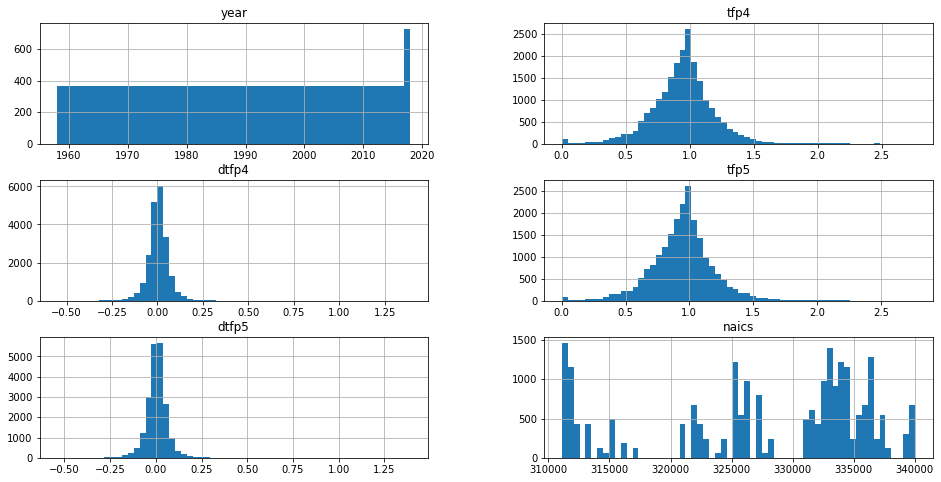

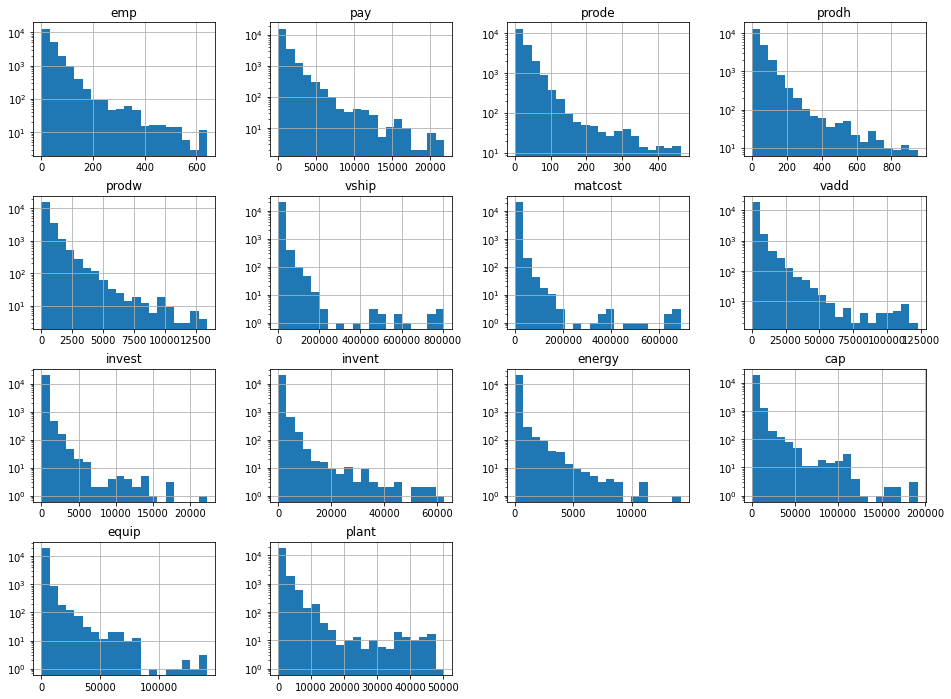

In [6]:
# Plot year, industry code, and TFP/dTFP distribution (linear scale)
fig1 = df[['year','tfp4','dtfp4','tfp5','dtfp5','naics']].hist(
    bins=60, figsize=(16,8), log=False)

# Plot other column distributions on logarithmic scale
fig2 = df[['emp','pay','prode','prodh','prodw','vship','matcost','vadd',
    'invest','invent','energy','cap','equip','plant']].hist(
    bins=20, figsize=(16,12), log=True)

## 3. Data Visualizations

### Largest manufacturing Industries Over Time

This dataset contains a multitude of interesting patterns and trends
over time, industry, etc. For example, the following section plots the
market caps of the top n industries each year for a given set of years
(parameters can be set in the first few lines, as commented). The chart
demonstrates the changing dominance of different industries over time,
as well as the overall growth of the entire market.

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set chart parameters
years = [1960,1985,2016]    # list of years to include
n = 5                       # number of industries to include per year
n_cols = 3                  # number of pie charts per row

# Get data for chosen years
cap_data = [df[df['year']==yr][['naics_title','naics','cap']]
    for yr in years]

# Identify top n industries for each year
top_n = [data.sort_values(['cap'], ascending=False).head(n)
    for data in cap_data]

# Ceiling division to find number of rows needed
n_years = len(years)
n_rows = -1 * (-n_years // n_cols)

# Create figure
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    specs=[
        [{'type':'pie'}]*n_cols]*n_rows,
        subplot_titles=["{}".format(yr) for yr in years]
    )

# Add trace (pie chart) for each year
for i in range(n_years):

    fig.add_trace(
        go.Pie(
            labels=top_n[i]['naics_title'],
            values=top_n[i]['cap'],
            scalegroup='one',
            name='{} Market Cap'.format(years[i])
        ), (-1*(-(i+1)//n_cols)), ((i%n_cols)+1)
    )   

title = "Total Market Capital of {} Largest Manufacturing Industries by Year".format(n)
fig.update_layout(title_text=title)

fig.show()

### Annualized Petrolium Refinery Costs vs. Value

The chart below is another example of identifying trends and patterns
within the dataset, this time comparing the material costs and value
added to the total shipment and new inventory value. These should be
roughly equivalent, and a cursory inspection of the resulting chart
confirms that assumption. This chart is specific to Petrolium Refineries
but could be easily changed to other industries by simply exchanging the
NAICS code at the top.

Text(0.5, 1.0, 'Annualized Product Value vs. Costs for Petroliumn Refineries')

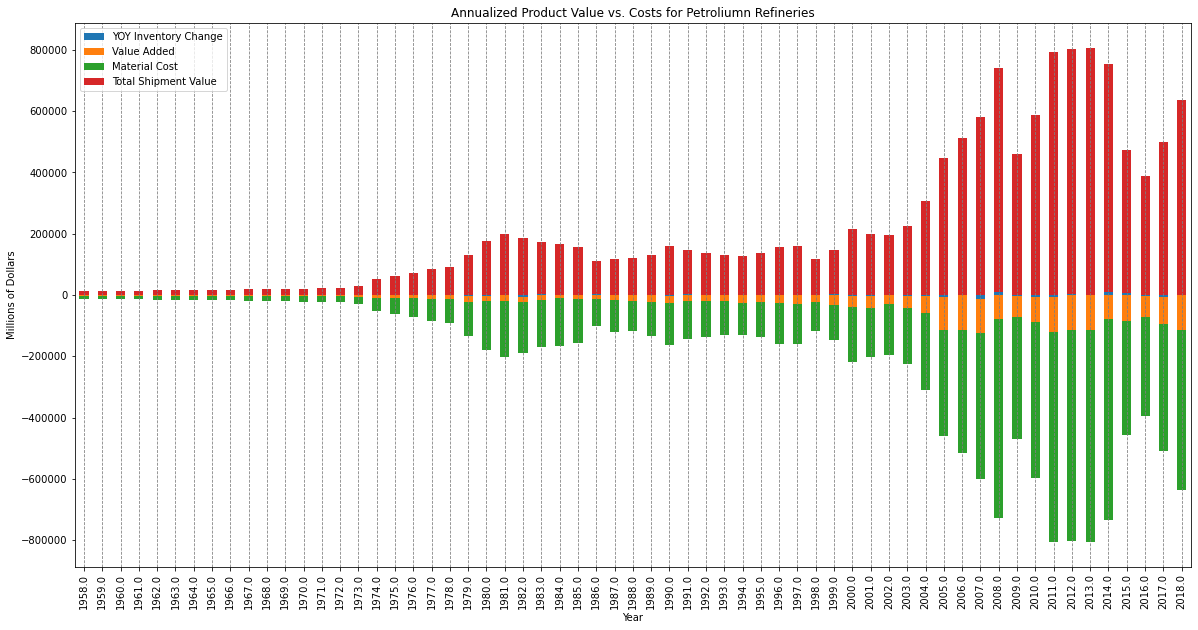

In [8]:
# Dataframe of all 'Petrolium Refineries' entries (NAICS: 324110)
code = 324110
petr_data = df[df['naics']==code].sort_values(by=['year'])

# Add column for difference in inventory from previous year
petr_data['d_inv'] = petr_data['invent'].diff()

# List of columns representing contributions to vship
costs = ['d_inv', 'vadd', 'matcost']

# Filter out unneeded columns and invert vship values
petr_data = -petr_data[costs+['year']].assign(vship = -petr_data['vship'])
petr_data['year'] = -petr_data['year']

# Create and format stacked bar plot
ax = petr_data.plot.bar(x='year', stacked=True, figsize=(20,10))
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_ylabel("Millions of Dollars")
ax.set_xlabel("Year")
ax.legend(['YOY Inventory Change', 'Value Added', 'Material Cost', 'Total Shipment Value'])
ax.set_title("Annualized Product Value vs. Costs for Petroliumn Refineries")

## 4. Different Groupings

### Production Worker Hourly Wages by Sector

The following section groups entries by industry sector, where the a
sector encompasses several industries and is indicated by the first 
three digits of the NAICS code of each entry. The groupings are used to
generate a scatterplot of number of production employees and hourly
wages by sector, along with color and size indications of, respectively,
the difference between production workers and other employees' hourly
wages, and the ratio of production workers to general employees.

In [9]:
import plotly.express as px

# Link to CSV file with all 3-digit NAICS codes and names
url2 = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Midterm%20Project/Part%202/naics_3-digit_codes.csv'

# Create dataframe from 3-digit NAICS code CSV
naics_df = pd.read_csv(url2)

# Create dictionary with codes as keys and category names as values
naics = dict(zip(naics_df.iloc[:,0], naics_df.iloc[:,1]))

# Add column to main df with industry secotr
# Sector is indicated by first 3 digits of NAICS code
df['sector'] = [naics[int(str(code)[:3])] for code in df['naics']]

# Group entries by sector and add fields and limit to 2016
df_cat = df[df['year']==2016].groupby(by=['sector']).sum()
df_cat['sector'] = df_cat.index

# Add column calculating average hourly rate by sector
df_cat['hrate'] = df_cat['prodw']/df_cat['prodh']

# Add column calculating hourly rate of salaried employeed by sector
df_cat['rate_diff'] = ((df_cat['pay']*1000/2080)/df_cat['emp'])-df_cat['hrate']

# Ratio of salaried to hourly employees
df_cat['prod_ratio'] = df_cat['prode']/df_cat['emp']

# Create scatterplot
fig = px.scatter(
     df_cat, x="prode", y="hrate", color="rate_diff", size='prod_ratio',
     hover_name="sector", size_max=55, height=600, width=1200,
     labels={
          "prode": "Number of production employees (thousands)",
          "hrate": "Average hourly pay rate ($/hr)",
          "prod_ratio": "Ratio of production workers to general employees"
     },
     title="2016 Manufacturing Production Worker Hourly Wages"
)
fig.show()



### Hourly Wages Over Time

This section plots the growth of hourly compensation over time for both
production and general employees. The rate of growth is approximately
linear and more consistent than expected, showing only very slight dips
around the times of the Dot-Com Bubble burst and the 2008 crash.

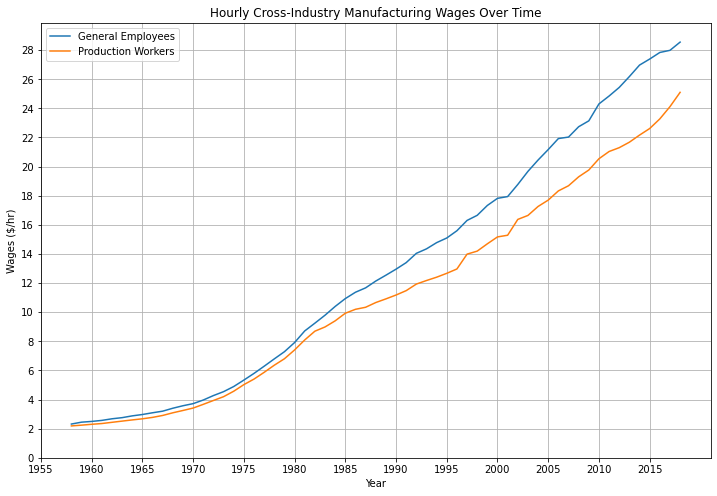

In [56]:
# Merge industries to represent the whole market in any given year
wages = df.groupby(by=['year']).sum()[['emp','pay','prode','prodw','prodh']]
wages['year'] = wages.index

# Hourly rates of production and general employees by year
wages['emp_rate'] = (wages['pay']*1000/2080)/wages['emp']
wages['prod_rate'] = wages['prodw']/wages['prodh']

# Plot hourly wages over time
plt.figure(figsize=(12,8))
plt.plot(wages['year'],wages['emp_rate'])
plt.plot(wages['year'],wages['prod_rate'])
plt.legend(["General Employees","Production Workers"])
plt.title("Hourly Cross-Industry Manufacturing Wages Over Time")
plt.xticks(np.arange(1955,2020,5))
plt.yticks(np.arange(0,30,2))
plt.xlabel("Year")
plt.ylabel("Wages ($/hr)")
plt.grid()

## 5. Correlation Analysis

### Most Highly Correlated Variables

This section identifies the most highly correlated n pairs of variables
in the dataset using the Pearson correlation coefficient.

In [22]:
# Find the absolute pairwise correlation between columns of the database
corr = df.corr(method ='pearson').abs()

# Convert corr matrix to list form and remove redundancies
# Source: https://stackoverflow.com/a/43073761
corr_list = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

# Get list n most highly correlated variable pairs
n = 10
high_corr = list(corr_list.sort_values(ascending=False).head(n).index)
print(*high_corr, sep='\n')

('tfp5', 'tfp4')
('prode', 'prodh')
('dtfp5', 'dtfp4')
('cap', 'equip')
('emp', 'prodh')
('emp', 'prode')
('vship', 'matcost')
('cap', 'plant')
('pay', 'prodw')
('year', 'pien')


### Correlation in the Wages DataFrame

Visual inspection of the correlation table is easier for the wages
dataframe, which is significantly smaller, having been grouped by year.
This inspection reveals a surprisingly strong inverse correlation
between the year and the number of employees. This may be a result of
the increasingly automated processes in manufacturing. This explanation
would also account for the difference between production workers and
other employees, since the number of production workers seems to bear an
even stronger negative correlation with the year.

Both of those correlations are found to have very low P-values (less
than 10^-11), and can therefore be regarded with very high confidence.

In [36]:
from scipy import stats

# Inspect the correlations between emp/year and prode/year
pearson_coef, p_value = stats.pearsonr(wages['emp'], wages['year'])
print(f"The Pearson Correlation Coefficient is {pearson_coef:0.3f} with a P-value of P = {p_value:.2e}")

pearson_coef, p_value = stats.pearsonr(wages['prode'], wages['year'])
print(f"The Pearson Correlation Coefficient is {pearson_coef:0.3f} with a P-value of P = {p_value:.2e}")

# Display correlation table for wages dataframe
corr2 = wages.corr(method='pearson')
display(corr2)

The Pearson Correlation Coefficient is -0.744 with a P-value of P = 6.47e-12
The Pearson Correlation Coefficient is -0.823 with a P-value of P = 3.90e-16


,emp,pay,prode,prodw,prodh,year,emp_rate,prod_rate
emp,1.000000,-0.637154,0.985328,-0.599211,0.979339,-0.743892,-0.825961,-0.817027
pay,-0.637154,1.000000,-0.737663,0.998420,-0.718245,0.974610,0.952325,0.954630
prode,0.985328,-0.737663,1.000000,-0.703365,0.993705,-0.823196,-0.888380,-0.881866
prodw,-0.599211,0.998420,-0.703365,1.000000,-0.684424,0.966026,0.937883,0.941238
prodh,0.979339,-0.718245,0.993705,-0.684424,1.000000,-0.811422,-0.875443,-0.872342
year,-0.743892,0.974610,-0.823196,0.966026,-0.811422,1.000000,0.988231,0.989704
emp_rate,-0.825961,0.952325,-0.888380,0.937883,-0.875443,0.988231,1.000000,0.999122
prod_rate,-0.817027,0.954630,-0.881866,0.941238,-0.872342,0.989704,0.999122,1.000000


As shown below, this correlation between number of employees/production
workers and year does exist, though it is not consistent. The number of
manufacturing employees rises until approximately 1980, when the number
begins to drop, likely as automation was rapidly introduced across a
variety of industries. This decline began to level off around 2009,
possibly as industry reached the limits of automation given available
technology. The fact that automation frees up resources for continued
growth may explain why the number of employees begins to rise again
after 2015.

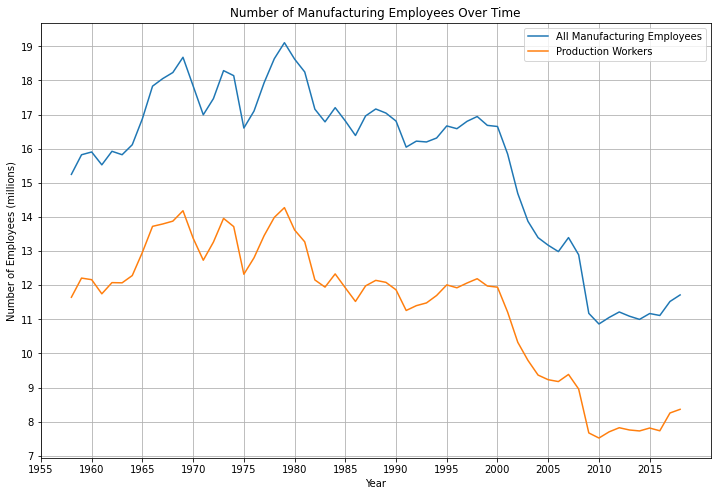

In [65]:
plt.figure(figsize=(12,8))
plt.plot(wages['year'],wages['emp']/1e3)
plt.plot(wages['year'],wages['prode']/1e3)
plt.legend(['All Manufacturing Employees', 'Production Workers'])
plt.title("Number of Manufacturing Employees Over Time")
plt.xticks(np.arange(1955,2020,5))
plt.yticks(np.arange(7,20,1))
plt.xlabel("Year")
plt.ylabel("Number of Employees (millions)")
plt.grid()